In [102]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [103]:
df = pd.read_excel(r"C:\Users\dario\Lab4\Esp_fibra_ottica\Apertura_numerica_e_dispersione_spaziale.xlsx",
                   skiprows=1, nrows=50, usecols="A:H")
df.head()


,2,α letto (°),αmax (°),αmax (rad),sen α,P,err α (rad),err sen α (rad)
0,1,0,0,0.000000,0.000000,1.64,0.017453,0.017453
1,2,2,2,0.034907,0.034899,1.61,0.017453,0.017443
2,3,4,4,0.069813,0.069756,1.59,0.017453,0.017411
3,4,6,6,0.104720,0.104528,1.57,0.017453,0.017358
4,5,8,8,0.139626,0.139173,1.54,0.017453,0.017283


Vogliamo misurare l'apertura numerica di una fibra, definita come

$NA = sin(\alpha_{max})$  , dove $\alpha_{max}$ corrisponde all'angolo per cui si ha riflessione totale interna all'interno della fabri fibra ottica

In [117]:
sin_alpha = list(df["sen α"])
P = list(df["P"])
err_sin_alpha = list(df["err sen α (rad)"])
alpha = list(df["αmax (rad)"])
err_alpha = list(df["err α  (rad)"])
P_max = np.max(P)

P_filt = []
sin_alpha_filt = []
err_sin_alpha_filt = []
alpha_filt = []
discard_index = []

for i in range(len(P)):
    if P[i] > 0.05*P_max:
        P_filt.append(P[i])
        
    else:
        discard_index.append(i)
        
        
# print(P)
# print(f"sin_alpha : {sin_alpha}")
# print(f"lista degli indici non presenti in P_filt: {discard_index}")
# print(f"P_filt: {P_filt}")

for i in range(len(sin_alpha)):
    if i in discard_index:
        continue
    else:
        sin_alpha_filt.append(sin_alpha[i])
        err_sin_alpha_filt.append(err_sin_alpha[i])
        err_sin_alpha_filt.append(err_alpha[i])
        alpha_filt.append(alpha[i])
        
        
print(f"sin_alpha_filt : {sin_alpha_filt}")
print(len(sin_alpha_filt))
    

sin_alpha_filt : [0.0, 0.03489949670250097, 0.0697564737441253, 0.10452846326765347, 0.13917310096006544, 0.17364817766693033, 0.20791169081775934, 0.24192189559966773, 0.27563735581699916, 0.3090169943749474, 0.3420201433256687, 0.374606593415912, 0.4067366430758002, 0.4383711467890774, -0.03489949670250097, -0.0697564737441253, -0.10452846326765347, -0.13917310096006544, -0.17364817766693033, -0.20791169081775934, -0.24192189559966773, -0.27563735581699916, -0.3090169943749474, -0.3420201433256687, -0.374606593415912, -0.4067366430758002, -0.4383711467890774, -0.4694715627858908, -0.49999999999999994]
29


[1.64, 1.61, 1.59, 1.57, 1.54, 1.52, 1.5, 1.49, 1.46, 1.43, 1.35, 0.82, 0.366, 0.14, 1.64, 1.64, 1.62, 1.61, 1.59, 1.58, 1.57, 1.55, 1.54, 1.52, 1.49, 1.41, 0.688, 0.338, 0.111]


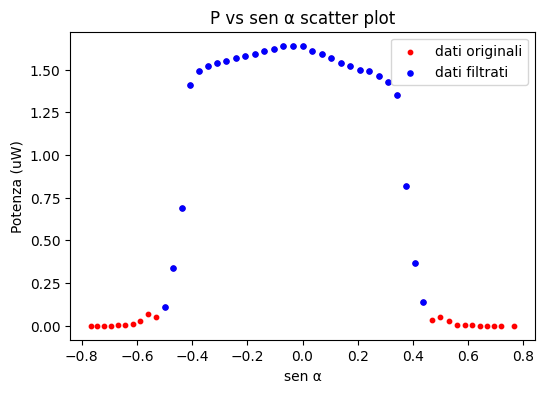

In [108]:
fig = plt.figure( figsize=(6,4))
plt.scatter(sin_alpha, P, color = "red", s = 10, label = "dati originali")
plt.xlabel("sen α")
plt.ylabel("Potenza (uW)")
plt.title("P vs sen α scatter plot")


plt.scatter(sin_alpha_filt, P_filt, color = "blue", s = 14, label = "dati filtrati")
plt.xlabel("sen α")
plt.ylabel("Potenza (uW)")
plt.title("P vs sen α scatter plot")

plt.legend()

print(P_filt)


In [121]:
NA = (max(sin_alpha_filt) - min(sin_alpha_filt))/2
err_NA = np.sqrt((np.cos( max(alpha_filt) )* max(err_alpha))**2 +  (np.cos( min(sin_alpha_filt) ) * min(err_alpha))**2)
print(f"Valore stimato dell'apertura numerica:\nNA = {NA:.3f} +- {err_NA:.2f} ")

Valore stimato dell'apertura numerica:
NA = 0.469 +- 0.02 
